<a href="https://colab.research.google.com/github/Avanthika8/IIIT_H_AIML_Training_Labs/blob/main/1_2_Machine_Learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [2]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [3]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

In [4]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [5]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [6]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [7]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [8]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [9]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

What is the accuracy of our classifiers on the train dataset?

In [10]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [11]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [12]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [13]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?             
Ans : Increasing the percentage of the validation set generally improves the accuracy estimation because it provides a larger and more representative sample for evaluating the model's performance on unseen data. This can enhance confidence in the model's ability to generalize to new instances. Conversely, reducing the validation set percentage may compromise accuracy estimation as the smaller sample size may not adequately reflect the data's variability, potentially leading to less reliable performance metrics for the model.

2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?             
Ans : The size of the train and validation sets directly influences the accuracy prediction on the test set through the validation set. A larger train set typically leads to a model that generalizes better due to more diverse training examples, potentially resulting in higher accuracy on both the validation and test sets. A larger validation set can provide a more reliable estimate of the model's performance, enhancing confidence in the predicted accuracy on the separate test set, provided the validation set adequately represents the test set's characteristics.

3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?                         
Ans : A good percentage to reserve for the validation set often balances between having enough data to reliably estimate model performance and ensuring sufficient training data for effective model learning. Typically, allocating around 20% of the total dataset to the validation set is a common practice. This percentage allows for robust model evaluation while still providing a substantial amount of data for training, striking a balance between accuracy estimation and model training effectiveness.

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

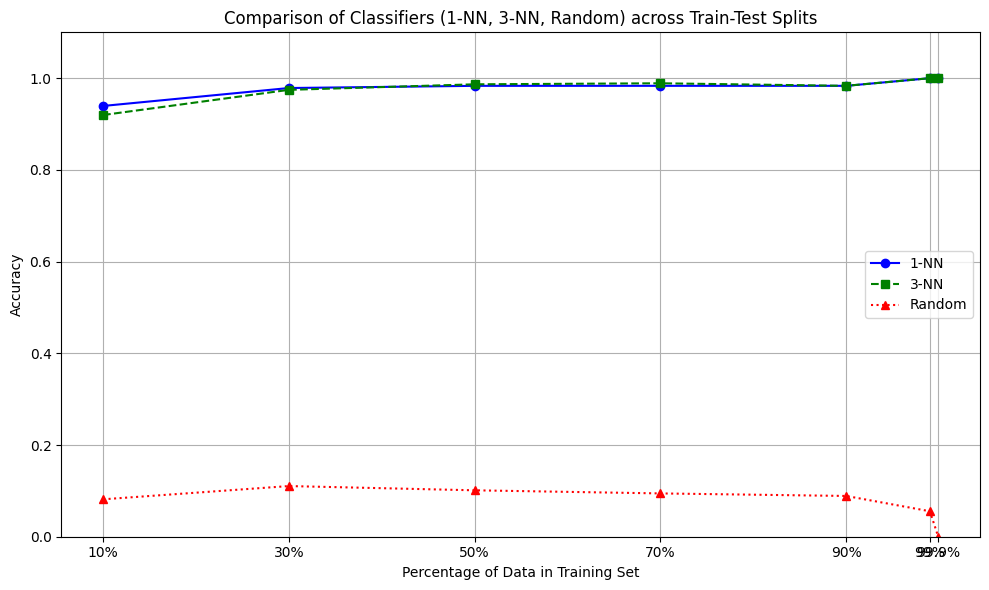

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Load the digits dataset (you can replace this with your dataset)
digits = load_digits()

# List to store results
split_percentages = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 0.999]
accuracies_1nn = []
accuracies_3nn = []
accuracies_random = []

# Loop through different train-test split percentages
for split in split_percentages:
    X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=1-split, random_state=42)

    # 1-nearest neighbor classifier
    knn_1 = KNeighborsClassifier(n_neighbors=1)
    knn_1.fit(X_train, y_train)
    y_pred_1 = knn_1.predict(X_test)
    accuracy_1nn = accuracy_score(y_test, y_pred_1)
    accuracies_1nn.append(accuracy_1nn)

    # 3-nearest neighbor classifier
    knn_3 = KNeighborsClassifier(n_neighbors=3)
    knn_3.fit(X_train, y_train)
    y_pred_3 = knn_3.predict(X_test)
    accuracy_3nn = accuracy_score(y_test, y_pred_3)
    accuracies_3nn.append(accuracy_3nn)

    # Random classifier (stratified)
    random_clf = DummyClassifier(strategy='stratified', random_state=42)
    random_clf.fit(X_train, y_train)
    y_pred_random = random_clf.predict(X_test)
    accuracy_random = accuracy_score(y_test, y_pred_random)
    accuracies_random.append(accuracy_random)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(split_percentages, accuracies_1nn, marker='o', linestyle='-', color='b', label='1-NN')
plt.plot(split_percentages, accuracies_3nn, marker='s', linestyle='--', color='g', label='3-NN')
plt.plot(split_percentages, accuracies_random, marker='^', linestyle=':', color='r', label='Random')
plt.xlabel('Percentage of Data in Training Set')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifiers (1-NN, 3-NN, Random) across Train-Test Splits')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.xticks(split_percentages, ['10%', '30%', '50%', '70%', '90%', '99%', '99.9%'])
plt.tight_layout()
plt.show()


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [14]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [15]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.58463539517022 %
Test accuracy: 34.91795366795367 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?               
Ans : Yes, averaging the validation accuracy across multiple splits generally provides more consistent and reliable results. By averaging, you reduce the impact of randomness and variability that can occur due to different data splits, providing a more stable estimation of model performance across diverse subsets of the data.

2. Does it give more accurate estimate of test accuracy?  
Ans : Averaging the validation accuracy across multiple splits does not directly give a more accurate estimate of test accuracy. However, it provides a more reliable estimate of how well the model generalizes to unseen data by reducing the bias introduced by a single train-test split, thereby increasing confidence in the model's expected performance on a separate test set.

3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?             
Ans : The number of iterations in machine learning algorithms affects the stability and precision of estimates but does not always guarantee a better estimate. Higher iterations can reduce variance and improve convergence, leading to more robust estimates in models like neural networks or iterative optimization methods. However, excessive iterations may also risk overfitting to the training data, necessitating a balance based on model complexity and dataset characteristics for optimal performance.

4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?   
Ans : Increasing iterations can mitigate the effects of small datasets to some extent by allowing the model to learn more from limited data. However, it's crucial to balance iterations with dataset size and complexity to avoid overfitting and ensure generalizability, as excessively high iterations might still lead to poor performance on unseen data if the dataset is too small to capture representative patterns.

> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

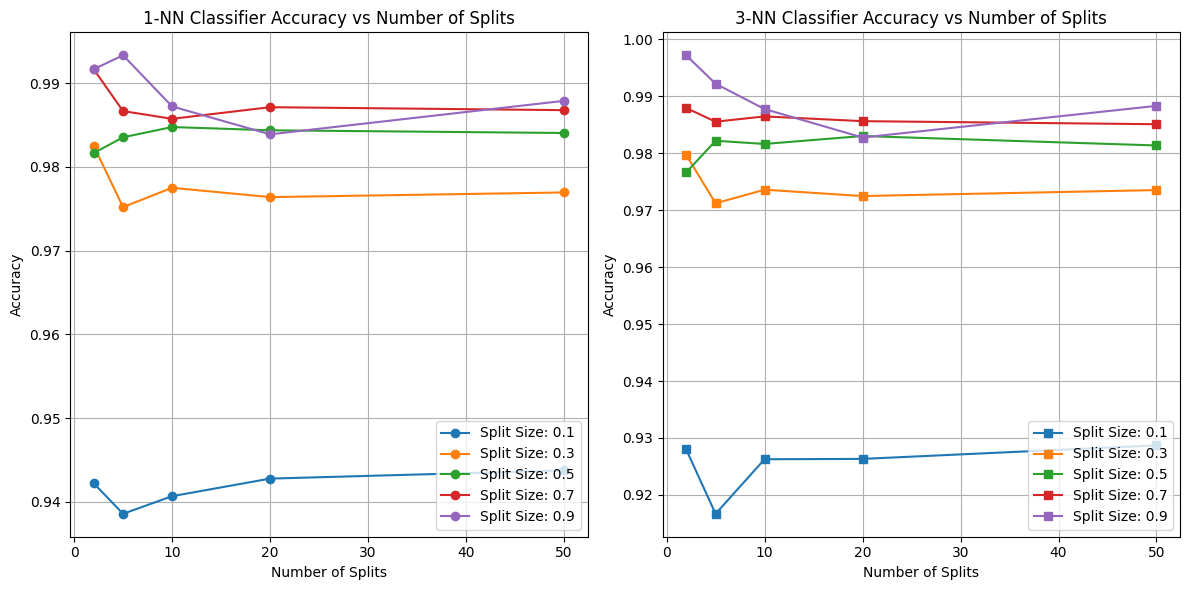

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the digits dataset (you can replace this with your dataset)
digits = load_digits()

# List to store results
split_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
split_numbers = [2, 5, 10, 20, 50]

accuracies_1nn = []
accuracies_3nn = []

# Loop through different split configurations
for split_size in split_sizes:
    for split_number in split_numbers:
        accuracies_1nn_split = []
        accuracies_3nn_split = []

        # Perform multiple splits and calculate accuracy for 1-NN and 3-NN
        for _ in range(split_number):
            X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=1-split_size, random_state=None)

            # 1-nearest neighbor classifier
            knn_1 = KNeighborsClassifier(n_neighbors=1)
            knn_1.fit(X_train, y_train)
            accuracy_1nn = knn_1.score(X_test, y_test)
            accuracies_1nn_split.append(accuracy_1nn)

            # 3-nearest neighbor classifier
            knn_3 = KNeighborsClassifier(n_neighbors=3)
            knn_3.fit(X_train, y_train)
            accuracy_3nn = knn_3.score(X_test, y_test)
            accuracies_3nn_split.append(accuracy_3nn)

        # Average accuracies across splits
        mean_accuracy_1nn = np.mean(accuracies_1nn_split)
        mean_accuracy_3nn = np.mean(accuracies_3nn_split)

        # Store averaged accuracies
        accuracies_1nn.append(mean_accuracy_1nn)
        accuracies_3nn.append(mean_accuracy_3nn)

# Reshape results for plotting
accuracies_1nn = np.array(accuracies_1nn).reshape(len(split_sizes), len(split_numbers))
accuracies_3nn = np.array(accuracies_3nn).reshape(len(split_sizes), len(split_numbers))

# Plotting results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(split_numbers, accuracies_1nn.T, marker='o')
plt.xlabel('Number of Splits')
plt.ylabel('Accuracy')
plt.title('1-NN Classifier Accuracy vs Number of Splits')
plt.legend([f'Split Size: {split_size}' for split_size in split_sizes], loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(split_numbers, accuracies_3nn.T, marker='s')
plt.xlabel('Number of Splits')
plt.ylabel('Accuracy')
plt.title('3-NN Classifier Accuracy vs Number of Splits')
plt.legend([f'Split Size: {split_size}' for split_size in split_sizes], loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()


This analysis provides insights into how the accuracy of the 3-nearest neighbor classifier changes with the number of splits and is affected by the split size, compared to the 1-nearest neighbor classifier, across various configurations. Adjusting these parameters can help optimize model performance depending on dataset characteristics and computational constraints.






